In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.discrete.discrete_model import Logit

from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

import seaborn as sns
%matplotlib inline 

from IPython.core.display import display, HTML

In [2]:
df = pd.read_excel('all.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210143 entries, 0 to 52565
Data columns (total 7 columns):
temp        210143 non-null float64
wind        210143 non-null float64
rain        210143 non-null float64
humi        210143 non-null float64
dew         210143 non-null float64
snow        210143 non-null float64
accident    210143 non-null int64
dtypes: float64(6), int64(1)
memory usage: 12.8 MB


In [4]:
df['accident'].value_counts()

0    191345
1     18798
Name: accident, dtype: int64

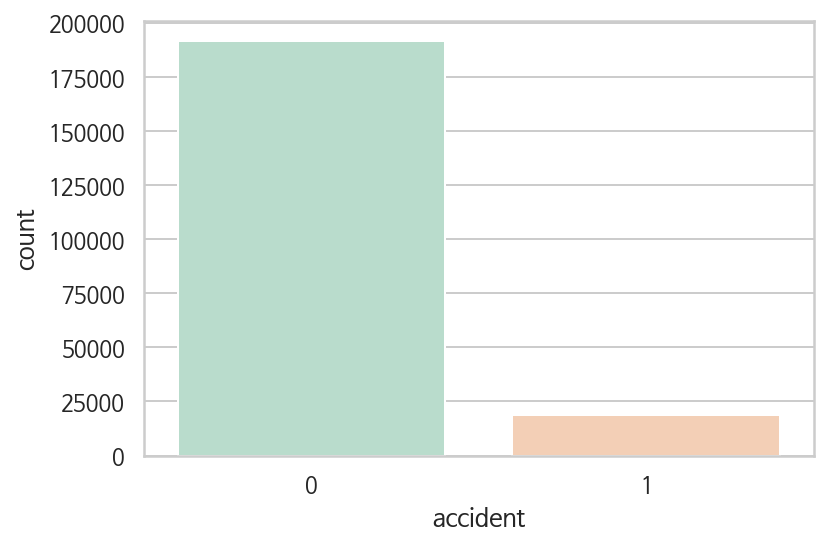

In [6]:
sns.countplot(x = 'accident', data=df, palette="Pastel2")

In [7]:
# correlation 확인
df.drop('accident',axis=1).corr()

,temp,wind,rain,humi,dew,snow
temp,1.000000,-0.076636,0.083592,0.199981,0.896915,-0.212490
wind,-0.076636,1.000000,0.044188,-0.258426,-0.181724,0.037725
rain,0.083592,0.044188,1.000000,0.226795,0.152455,-0.013024
humi,0.199981,-0.258426,0.226795,1.000000,0.588617,-0.004769
dew,0.896915,-0.181724,0.152455,0.588617,1.000000,-0.174528
snow,-0.212490,0.037725,-0.013024,-0.004769,-0.174528,1.000000


In [8]:
df.head()

,temp,wind,rain,humi,dew,snow,accident
0,-5.35,1.50,0.00,70.0,-9.85,0.0,0
1,-5.75,1.35,0.00,71.5,-9.85,0.0,0
2,-2.95,1.50,0.00,69.5,-6.15,0.0,0
3,-0.25,2.30,0.25,70.5,-3.45,0.0,0
4,0.80,3.90,0.00,69.5,-2.25,0.0,0


In [9]:
# 로지스틱 분석
from statsmodels.discrete.discrete_model import Logit
model = Logit.from_formula("accident ~ temp+wind+humi+dew+rain+snow", df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.275777
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               accident   No. Observations:               210143
Model:                          Logit   Df Residuals:                   210136
Method:                           MLE   Df Model:                            6
Date:                Mon, 01 Jul 2019   Pseudo R-squ.:                 0.08462
Time:                        15:13:24   Log-Likelihood:                -57953.
converged:                       True   LL-Null:                       -63310.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7616      0.104     -7.301      0.000      -0.966      -0.557
temp           0.0317      0.

In [10]:
df['predict'] = result.predict(df)
df[['accident','predict']].head()

,accident,predict
0,0,0.019757
1,0,0.018196
2,0,0.024038
3,0,0.028761
4,0,0.035639


In [11]:
result.pred_table()

array([[191345.,      0.],
       [ 18798.,      0.]])

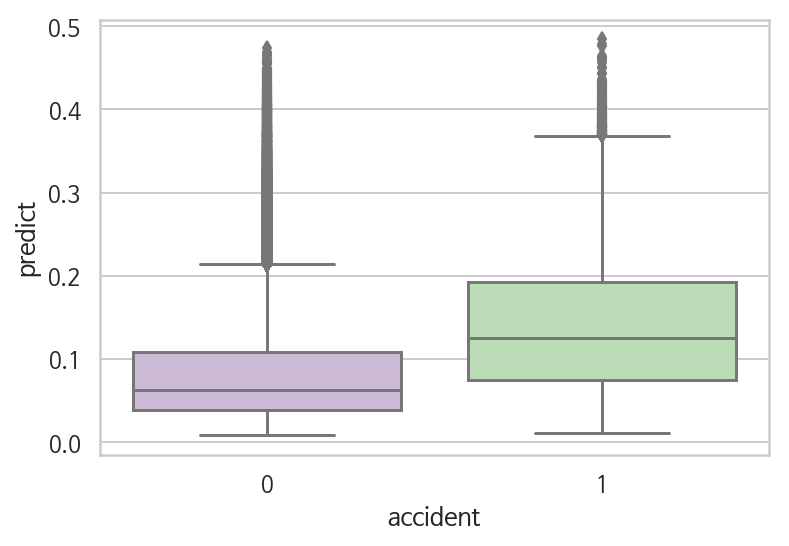

In [12]:
sns.boxplot(x="accident", y="predict", data=df, palette="PRGn")


In [13]:
df['accident'].value_counts()

0    191345
1     18798
Name: accident, dtype: int64

## sampling 분석

In [229]:
df = pd.read_excel('all.xlsx')

In [233]:
df_1 = df[df['accident']==1].sample(n=10000)
df_0 = df[df['accident']==0].sample(n =10000)
df_sample = df_1.append(df_0).reset_index(drop=True)

In [234]:
df_sample.head()

,temp,wind,rain,humi,dew,snow,accident
0,5.850,1.800,0.0,33.00,-9.10,0.0,1
1,26.075,1.775,0.0,43.50,15.70,0.0,1
2,4.600,3.000,0.0,35.50,-7.15,0.0,1
3,19.975,0.925,0.0,55.50,12.75,0.0,1
4,24.575,1.875,0.0,47.75,14.85,0.0,1


In [238]:
# train - test 데이터 분류
sample_data = df_sample[['temp','wind','rain','humi','dew','snow']]
sample_label = df_sample['accident']
train_data, test_data, train_label, test_label = train_test_split(sample_data, sample_label, test_size= 0.2, train_size= 0.8)

In [239]:
df_sample['accident'].value_counts()

1    10000
0    10000
Name: accident, dtype: int64

In [ ]:
pd.concat(train_data,pd.DataFrame(train_label))

In [214]:
model = Logit.from_formula("accident ~ temp+wind+humi+snow+dew+rain", df_sample)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.631546
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               accident   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1993
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:                 0.08887
Time:                        12:29:37   Log-Likelihood:                -1263.1
converged:                       True   LL-Null:                       -1386.3
                                        LLR p-value:                 2.405e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8476      0.641      2.883      0.004       0.592       3.103
temp           0.0203      0.

In [215]:
result.pred_table()

array([[667., 333.],
       [351., 649.]])

In [216]:
df_sample.head()

,temp,wind,rain,humi,dew,snow,accident
33056,10.90,0.30,0.0,59.0,4.2,0.0,1
12487,17.10,3.35,0.0,75.5,14.7,0.0,1
25935,-1.65,0.15,0.0,60.0,-7.2,0.0,1
3653,28.60,1.50,0.0,24.0,6.4,0.0,1
37659,17.25,1.50,0.0,43.5,4.9,0.0,1


In [217]:
df_sample['predict'] = result.predict(test_data)

/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1239: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to NanumBarunGothic.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1239: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to NanumBarunGothic.
  (prop.get_family(), self.defaultFamily[fontext]))


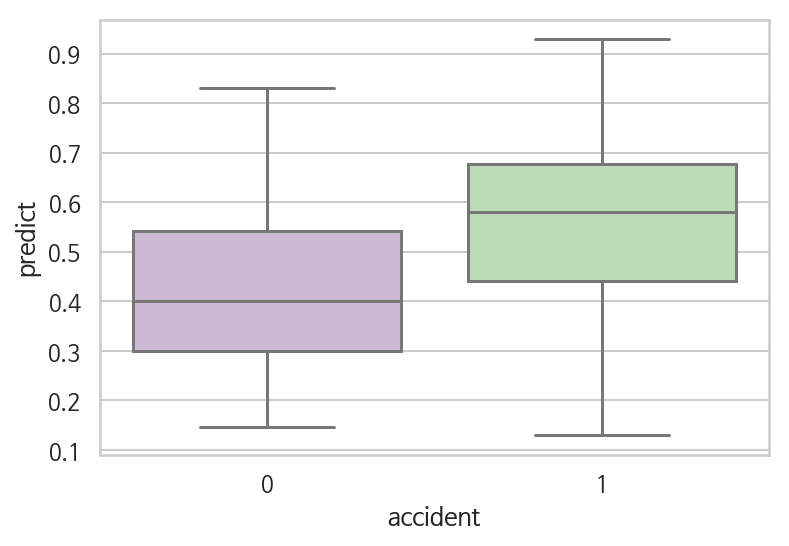

In [218]:
sns.boxplot(x="accident", y="predict", data=df_sample, palette="PRGn")

In [240]:
from sklearn import svm,metrics

In [241]:
clf = svm.SVC(decision_function_shape='ovr', kernel='sigmoid', degree=3, gamma='scale')

In [242]:
clf.fit(train_data, train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [243]:
#예측값
pre = clf.predict(test_data)

In [244]:
metrics.accuracy_score(test_label,pre)

0.429

## 데이터 카테고라이즈

In [127]:
df = pd.read_excel('all.xlsx')

In [128]:
df.groupby('accident', axis=0).count()

,temp,wind,rain,humi,dew,snow
accident,,,,,,
0,191345,191345,191345,191345,191345,191345
1,18798,18798,18798,18798,18798,18798


In [49]:
for i in ['temp', 'wind', 'humi', 'dew']:
    maxx = df[i].max()
    minn = df[i].min()
    amt = (maxx-minn)/5
    df[i] = np.select([df[i]<(minn+amt), df[i]<(minn+amt*2), df[i]<(minn+amt*3),\
                              df[i]<(minn+amt*4), df[i]<(minn+amt*5)],\
                            [1,2,3,4,5],default=np.nan)

In [50]:
df['temp'] = np.select([df['temp']<(minn+amt), df['temp']<(minn+amt*2), df['temp']<(minn+amt*3),\
                          df['temp']<(minn+amt*4), df['temp']<(minn+amt*5)],\
                        [1,2,3,4,5],default=np.nan)

In [129]:
df.dropna(inplace=True)

In [130]:
df.isna().sum()

temp        0
wind        0
rain        0
humi        0
dew         0
snow        0
accident    0
dtype: int64

In [53]:
df.head()

,temp,wind,rain,humi,dew,snow,accident
0,3.0,1.0,0.00,4.0,2.0,0.0,0
1,3.0,1.0,0.00,4.0,2.0,0.0,0
2,3.0,1.0,0.00,4.0,3.0,0.0,0
3,3.0,2.0,0.25,4.0,3.0,0.0,0
4,3.0,2.0,0.00,4.0,3.0,0.0,0


In [169]:
df_1 = df[df['accident']==1].sample(n=500)
df_0 = df[df['accident']==0].sample(n =500)
df_sample = df_1.append(df_0)
df_sample = df_sample.reset_index().drop(columns='index')

In [170]:
model = Logit.from_formula("accident ~ temp+wind+humi+snow+dew", df_sample)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.612199
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               accident   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:                  0.1168
Time:                        12:18:23   Log-Likelihood:                -612.20
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                 3.903e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8138      0.910      0.895      0.371      -0.969       2.597
temp           0.0663      0.

In [171]:
from sklearn import svm,metrics

In [200]:
clf = svm.SVC(decision_function_shape='ovr', kernel='poly', degree=2, gamma='scale')

In [201]:
clf.fit(df_sample[['temp','wind','humi','dew']], df_sample['accident'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [202]:
df_sample.head()

,temp,wind,rain,humi,dew,snow,accident,pred
0,-3.40,4.450,0.0,26.5,-17.25,0.0,1,1
1,14.50,0.800,0.0,68.5,9.85,0.0,1,1
2,27.85,1.800,0.0,67.0,21.00,0.0,1,1
3,18.75,2.075,0.0,54.5,10.90,0.0,1,1
4,25.95,0.150,0.0,80.0,21.90,0.0,1,1


In [186]:
# test dataset
df_test = df.sample(n=1000).reset_index()

In [187]:
df_test.drop(columns='index', inplace=True)

In [188]:
df_test.head()

,temp,wind,rain,humi,dew,snow,accident
0,-3.50,3.20,0.0,49.0,-11.05,0.0,0
1,20.85,2.95,0.0,74.0,18.30,0.0,0
2,20.90,0.85,0.0,64.0,18.50,0.0,0
3,8.20,0.35,0.0,61.0,3.50,0.0,1
4,16.65,2.55,0.0,20.0,-5.40,0.0,1


In [203]:
#예측값
df_sample['pred']= clf.predict(df_test.drop(columns=['accident','rain','snow']))

In [204]:
df_sample.head()

,temp,wind,rain,humi,dew,snow,accident,pred
0,-3.40,4.450,0.0,26.5,-17.25,0.0,1,0
1,14.50,0.800,0.0,68.5,9.85,0.0,1,1
2,27.85,1.800,0.0,67.0,21.00,0.0,1,1
3,18.75,2.075,0.0,54.5,10.90,0.0,1,0
4,25.95,0.150,0.0,80.0,21.90,0.0,1,1


In [205]:
inits = 0
total = 0 
for a in range(len(df_sample['pred'])):
    if df_sample['accident'].iloc[a] == df_sample['pred'].iloc[a]:
        inits += 1
    total += 1
print(inits / total)

0.519


In [199]:
metrics.accuracy_score(df_sample['accident'],df_sample['pred'])

0.521

# 그래프

In [254]:
df = pd.read_excel('/Users/lesson6_mac/Downloads/TeamProject/history/산악데이터_old.xlsx')
df.head()

,소방서명,센터명,신고일시,사고원인,사고장소,조난,외부요인,개인질환,활동개요,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,통영소방서,소방정대,20180603162400,일반조난,기타 산(정상),조난,외부요인,NaN,가마봉 아래 50미터 지점 아래 급경사 낭떠러지에서 길을 잃은 상태에서...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,외부요인,개인질환,조난,날씨
1,산청소방서,산악구조대,20161105095700,산악기타,산기타,조난,외부요인,개인질환,○ 09:57 종합상황실로부터 신고접수/n ○ 09:58 신고자와 통화하여...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,실족,어지러,고립,강풍
2,남해소방서,상주119지역대,20150621114700,개인(급.만성)질환,정상,조난,외부요인,개인질환,-11:43 신고접수 /n -11:47 현장출동 및 헬기요청 /n -1...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,추락,삐어,실종,NaN
3,산청소방서,산악구조대,20140920110800,실족추락,산기타,NaN,외부요인,NaN,○ 11:08 구조대원 3명 출동함./n ○ 11:25 구조대원 3명 환경교육...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,낙상,접질,길 잃,NaN
4,산청소방서,산악구조대,20150818122100,산악기타,산기타,조난,외부요인,NaN,○ 12:31 신고접수 및 출동/n ○ 12:32 국립공원 직원에게 환자상태 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,대퇴부,미끄,길을 잃,NaN


In [316]:
groupedvalues = df.groupby('사고원인').count().reset_index()
groupedvalues.head()

,사고원인,소방서명,센터명,신고일시,사고장소,조난,외부요인,개인질환,활동개요,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,개인(급.만성)질환,322,322,322,322,102,265,49,320,0,...,0,0,0,0,0,0,3,1,2,0
1,개인질환,139,139,139,139,46,107,14,135,0,...,0,0,0,0,0,0,1,0,1,0
2,고온환경질환,1,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,기타산악,634,634,634,634,241,429,11,623,0,...,0,0,0,0,0,0,3,0,3,0
4,낙석·낙빙,10,10,10,10,3,9,0,10,0,...,0,0,0,0,0,0,0,0,0,0


# 사고별 빈도수 그래프

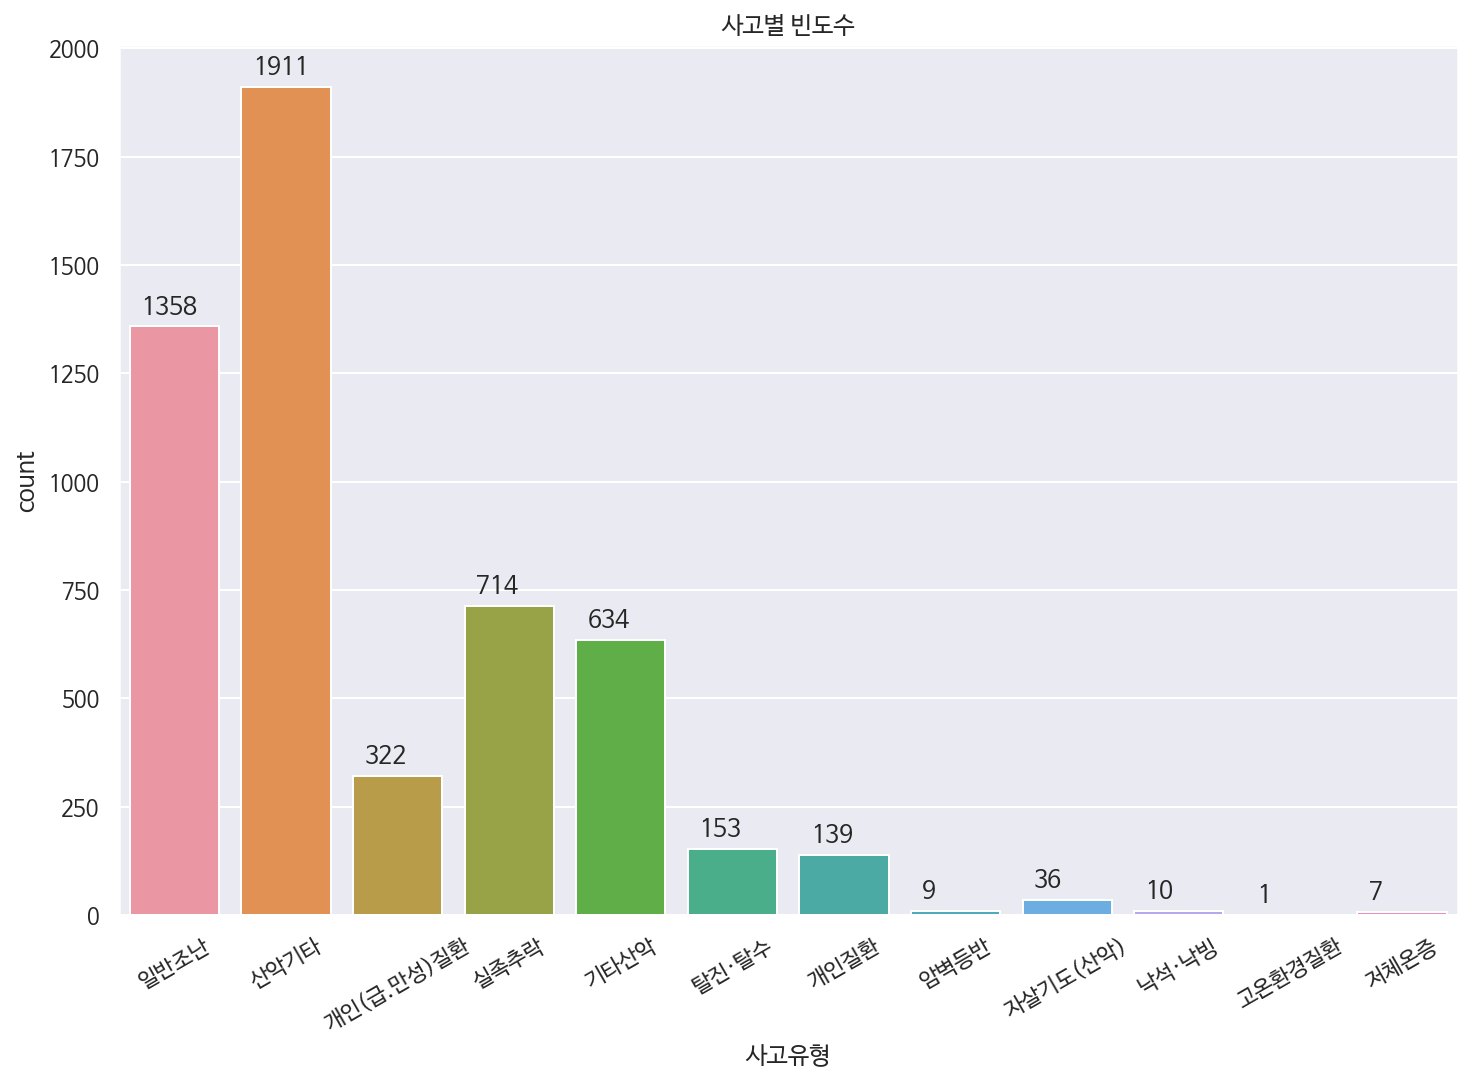

In [329]:
sns.set(rc={'figure.figsize':(12,8), 'font.sans-serif': 'NamuGothic', })
g = sns.countplot(x='사고원인', data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('사고별 빈도수')
plt.xlabel('사고유형')

for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+30)  )


# 표만들기

In [333]:
df = pd.read_excel('/Users/lesson6_mac/Downloads/TeamProject/trial1/comb_mini_c1.xlsx')
df.head()

,Cause,dew_c,wind_c,temp_c,humi_c,rain_c,snow_c,count
0,일반조난,1.0,2.0,1.0,2.0,0,1,1
1,일반조난,2.0,1.0,1.0,3.0,0,1,1
2,산악기타,2.0,2.0,2.0,3.0,0,1,1
3,일반조난,3.0,1.0,2.0,3.0,0,1,1
4,일반조난,3.0,1.0,2.0,3.0,0,1,1


In [341]:
table = {}
for i in ['dew_c', 'wind_c', 'temp_c', 'humi_c', 'rain_c', 'snow_c']:
    df1 = df.groupby(['Cause',i]).count()
    df2 = df.groupby('Cause').count()
    table[i] = (round(df1['count']/df2['count'] * 100, 1))
    
    

In [346]:
tablet = pd.DataFrame(table)
tablet = tablet.fillna(0)
tablet


dew_c  humi_c  rain_c  snow_c  temp_c  wind_c
개인질환 0.0    0.0     0.0    96.7    98.3     0.0     0.0
     1.0    1.9     8.9     3.3     1.7     1.7    48.3
     2.0   10.3    30.0     0.0     0.0    13.7    46.9
     3.0   24.8    36.6     0.0     0.0    23.8     4.7
     4.0   36.4    20.2     0.0     0.0    49.6     0.1
     5.0   26.4     4.3     0.0     0.0    11.2     0.0
낙석낙빙 0.0    0.0     0.0    87.0    97.8     0.0     0.0
     1.0    2.2     6.5    13.0     2.2     2.2    34.8
     2.0   13.0    37.0     0.0     0.0    23.9    60.9
     3.0   30.4    34.8     0.0     0.0    19.6     4.3
     4.0   34.8    15.2     0.0     0.0    52.2     0.0
     5.0   19.6     6.5     0.0     0.0     2.2     0.0
산악기타 0.0    0.0     0.0    96.1    97.0     0.0     0.0
     1.0    1.7     8.1     3.9     3.0     2.0    47.6
     2.0   13.0    31.1     0.0     0.0    16.8    47.3
     3.0   25.2    34.9     0.0     0.0    24.1     4.9
     4.0   35.5    20.3     0.0     0.0    48.7     0.2
     5.0   24.6     5.5     0.0     0.0     8.4     0.0
실족추락 0.0    0.0     0.0    96.0    97.0     0.0     0.0
     1.0    2.1    10.4     4.0     3.0     2.2    45.3
     2.0   15.1    36.9     0.0     0.0    18.8    49.3
     3.0   27.0    33.3     0.0     0.0    24.6     5.3
     4.0   36.3    15.5     0.0     0.0    46.1     0.1
     5.0   19.5     3.9     0.0     0.0     8.3     0.0
암벽등반 0.0    0.0     0.0    97.1   100.0     0.0     0.0
     1.0    0.0     9.2     2.9     0.0     0.0    46.6
     2.0    8.0    27.6     0.0     0.0     5.2    47.7
     3.0   20.1    47.7     0.0     0.0    26.4     5.7
     4.0   47.7    14.9     0.0     0.0    60.3     0.0
     5.0   24.1     0.6     0.0     0.0     8.0     0.0
일반조난 0.0    0.0     0.0    94.7    98.1     0.0     0.0
     1.0    1.3     7.8     5.3     1.9     1.4    51.4
     2.0   12.2    29.0     0.0     0.0    16.4    43.8
     3.0   23.6    33.5     0.0     0.0    26.0     4.5
     4.0   37.5    21.5     0.0     0.0    48.3     0.2
     5.0   25.4     8.2     0.0     0.0     7.9     0.0
저체온증 0.0    0.0     0.0    86.2    89.7     0.0     0.0
     1.0   20.7    13.8    13.8    10.3    13.8    34.5
     2.0   27.6    44.8     0.0     0.0    41.4    48.3
     3.0   31.0    10.3     0.0     0.0    31.0    10.3
     4.0   20.7    17.2     0.0     0.0    13.8     6.9
     5.0    0.0    13.8     0.0     0.0     0.0     0.0
탈진탈수 0.0    0.0     0.0    97.3    98.9     0.0     0.0
     1.0    0.9     6.0     2.7     1.1     1.6    50.4
     2.0    5.6    31.6     0.0     0.0     6.7    47.1
     3.0   18.0    36.0     0.0     0.0    19.6     2.2
     4.0   37.3    20.4     0.0     0.0    49.1     0.2
     5.0   38.0     6.0     0.0     0.0    23.1     0.0

# 날씨 요소별 분포 파이차트

In [107]:
df = pd.read_excel('/Users/lesson6_mac/Downloads/TeamProject/trial1/comb_mini_c.xlsx')
df.head()

,Cause,humi,temp,wind,rain,dew,snow,dew_c,wind_c,temp_c,humi_c,rain_c,snow_c
0,일반조난,34.50,-12.725,3.000,0.0,-23.00,11.250,1.0,2.0,1.0,2.0,0,1
1,일반조난,46.25,-5.675,1.775,0.0,-14.65,8.925,2.0,1.0,1.0,3.0,0,1
2,산악기타,62.25,-2.900,2.475,0.0,-7.35,3.700,2.0,2.0,2.0,3.0,0,1
3,일반조난,59.50,-0.300,1.800,0.0,-6.00,3.525,3.0,1.0,2.0,3.0,0,1
4,일반조난,55.00,0.700,1.400,0.0,-5.00,3.450,3.0,1.0,2.0,3.0,0,1


In [108]:
df = df.drop(columns=['humi','temp','wind','rain','dew','snow'])
df.head()

,Cause,dew_c,wind_c,temp_c,humi_c,rain_c,snow_c
0,일반조난,1.0,2.0,1.0,2.0,0,1
1,일반조난,2.0,1.0,1.0,3.0,0,1
2,산악기타,2.0,2.0,2.0,3.0,0,1
3,일반조난,3.0,1.0,2.0,3.0,0,1
4,일반조난,3.0,1.0,2.0,3.0,0,1
5,일반조난,3.0,2.0,2.0,3.0,0,1
6,일반조난,3.0,1.0,2.0,2.0,0,1
7,일반조난,3.0,1.0,2.0,2.0,0,1
8,일반조난,3.0,1.0,2.0,2.0,0,1
9,일반조난,3.0,1.0,2.0,4.0,0,0


In [121]:
df.rename(columns={'Cause':'사고유형', 'dew_c':'이슬점', 'wind_c':'바람세기', 'temp_c':'기온', 'humi_c':'습도', 'rain_c':'강수량', 'snow_c':'적설량'}, inplace=True)
df.head()

,사고유형,이슬점,바람세기,기온,습도,강수량,적설량
0,일반조난,1.0,2.0,1.0,2.0,0,1
1,일반조난,2.0,1.0,1.0,3.0,0,1
2,산악기타,2.0,2.0,2.0,3.0,0,1
3,일반조난,3.0,1.0,2.0,3.0,0,1
4,일반조난,3.0,1.0,2.0,3.0,0,1


In [122]:
df['이슬점'].value_counts()

4.0    11590
3.0     7883
5.0     7585
2.0     4082
1.0      519
Name: 이슬점, dtype: int64

In [123]:
lists = df.columns[1:5]
lists

Index(['이슬점', '바람세기', '기온', '습도'], dtype='object')

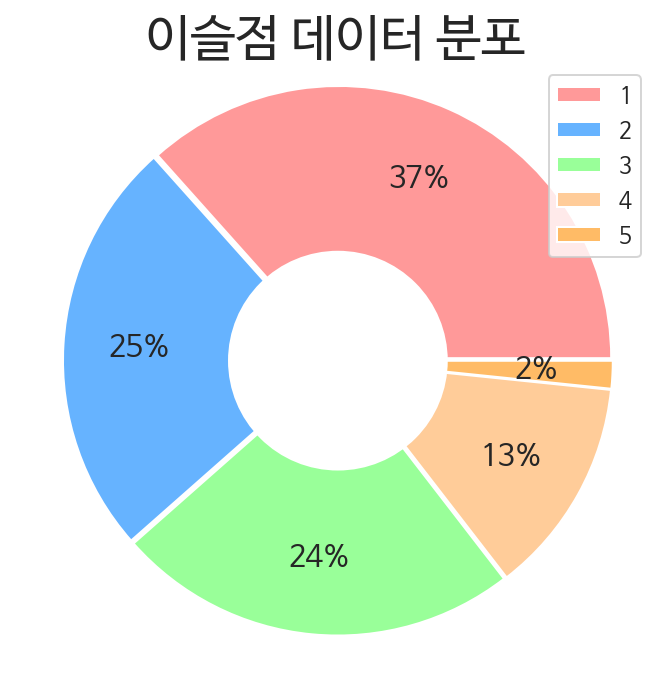

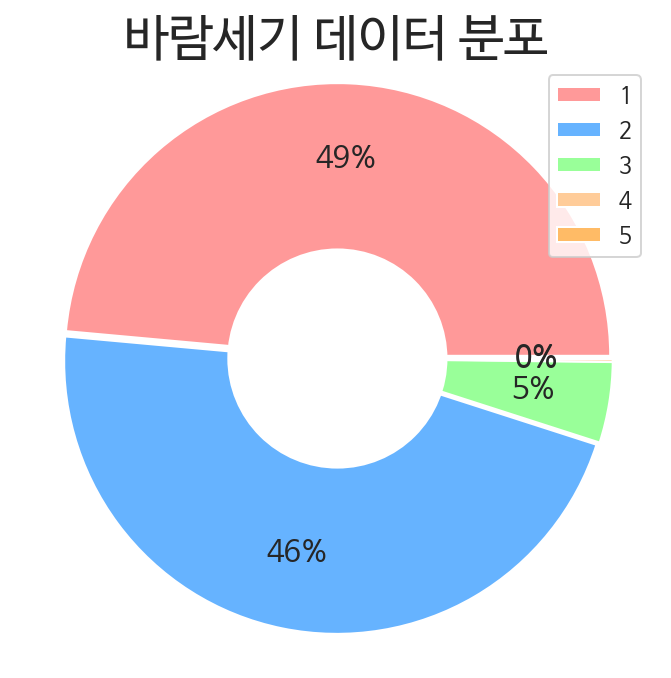

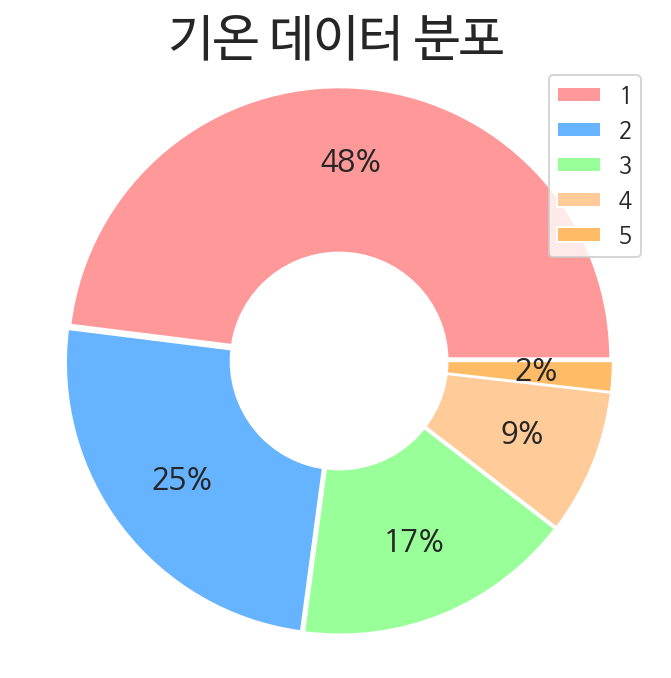

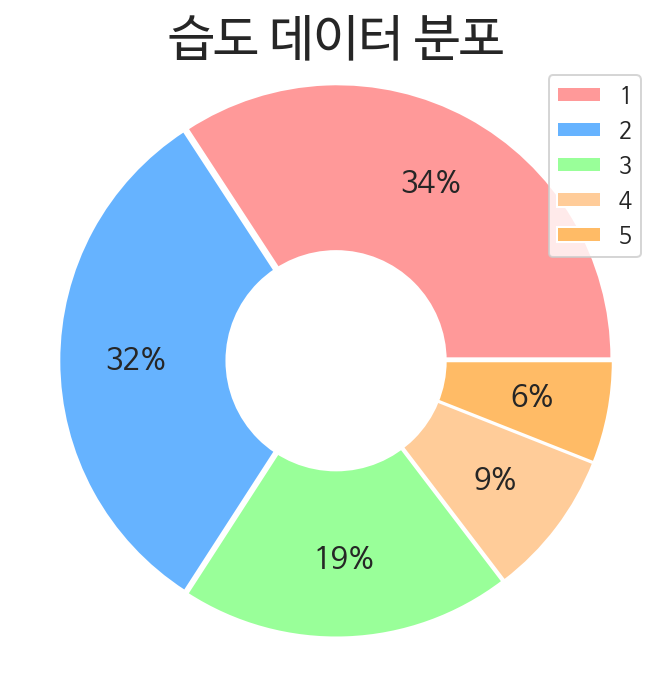

In [126]:
for i in lists:
    plt.figure(figsize=(5,5))
    mpl.rcParams['font.size'] = 15.0
    labels = ['1', '2', '3', '4', '5']
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffbb66']
    explode = (0.01,0.01,0.01,0.01,0.01)

    patches, texts, autotexts =plt.pie(df[i].value_counts(), autopct='%1.0f%%', colors=colors, explode=explode, pctdistance=0.72)


    centre_circle = plt.Circle((0,0),0.40,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.title(i + ' 데이터 분포', fontsize = 25)
    plt.tight_layout()


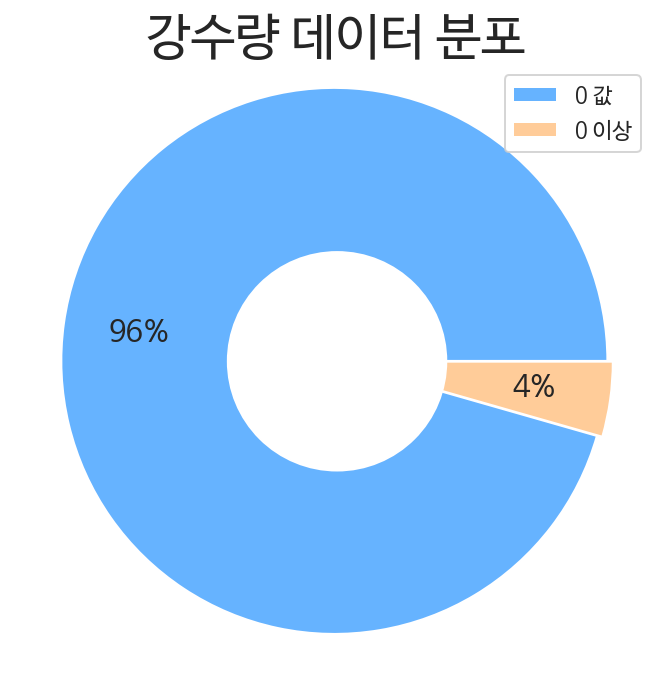

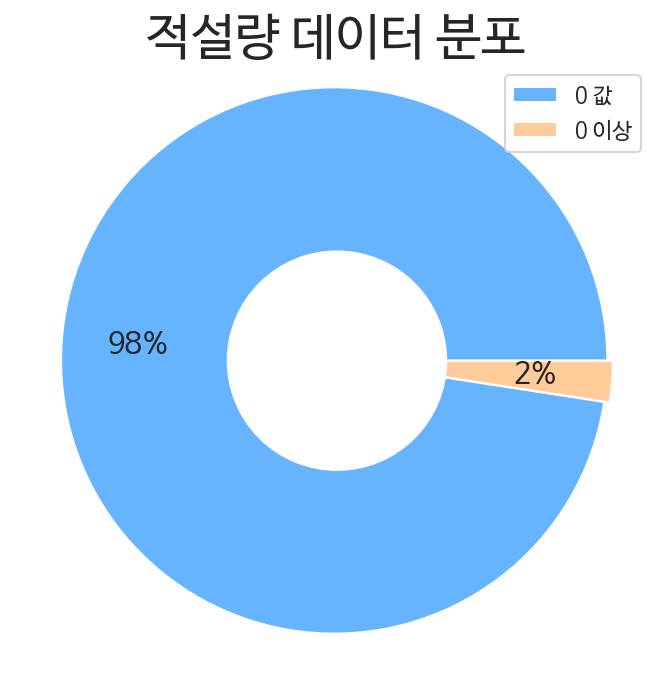

In [128]:
for i in df.columns[5:7]:
    plt.figure(figsize=(5,5))
    mpl.rcParams['font.size'] = 15.0
    labels = ['0 값', '0 이상']
    colors = ['#66b3ff','#ffcc99']
    explode = (0.01,0.01)

    patches, texts, autotexts =plt.pie(df[i].value_counts(), autopct='%1.0f%%', colors=colors, explode=explode, pctdistance=0.72)


    centre_circle = plt.Circle((0,0),0.40,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.title(i + ' 데이터 분포', fontsize = 25)
    plt.tight_layout()
